<a href="https://colab.research.google.com/github/jayasankha1010/Machine_learning_with_python/blob/master/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline 

In [2]:
#download the data set(csv file)

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-08 11:13:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   234KB/s    in 0.3s    

2020-06-08 11:13:28 (234 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
# read the csv file into pandas data frame

df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#extract the necessary features

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


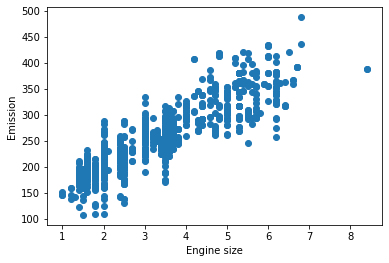

In [5]:
# 2d plotting one variable with the target

plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

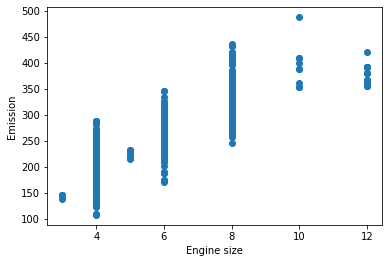

In [6]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

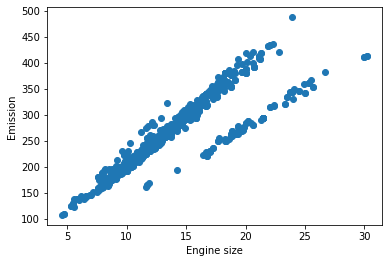

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

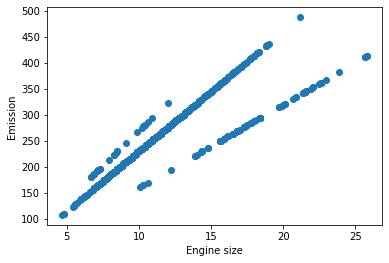

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

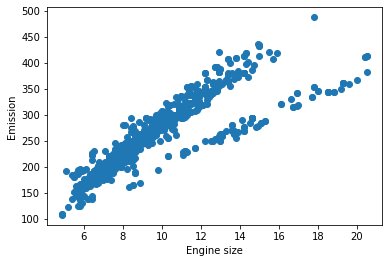

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

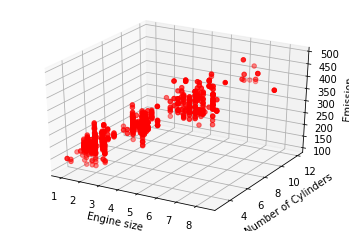

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cdf.ENGINESIZE, cdf.CYLINDERS,cdf.CO2EMISSIONS, c='r', marker='o')

ax.set_xlabel('Engine size')
ax.set_ylabel('Number of Cylinders')
ax.set_zlabel('Emission')

plt.show()

In [0]:
#train test split

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

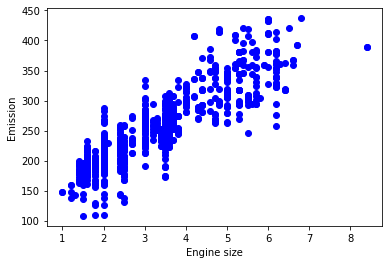

In [21]:
#plot train data set to visualize

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [26]:
#train the regr model from multiple regression

from sklearn import linear_model

#model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

#the coefficients

print('Coefficients: ', regr.coef_)

Coefficients:  [[10.54788564  7.31933901 -4.70861542 -6.24742576 20.27372989]]


In [36]:
#y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(x)


print("residual sum of squares: %.2f" % np.mean((y_hat - y)**2))
print("Variance score: %.2f" % regr.score(x,y))

residual sum of squares: 519.08
Variance score: 0.86


Regr model was trained
